# Neural Networks -TensorFlow
- link: https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.16467&showTestData=false&discretize=true&percTrainData=30&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&discretize_hide=false&regularization_hide=false&learningRate_hide=false&regularizationRate_hide=false&percTrainData_hide=false&showTestData_hide=false&noise_hide=false&batchSize_hide=false

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

Once we have our required libraries imported into our notebook, we can create the dummy data using Scikit-learn's make_blobs method. The make_blobs is used to create sample values and contains many parameters that change the shape and values of the sample dataset. For our purposes, we'll use the make_blobs method to create 1,000 samples with two features (also known as our x- and y-axis values) that are linearly separable into two groups. 

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

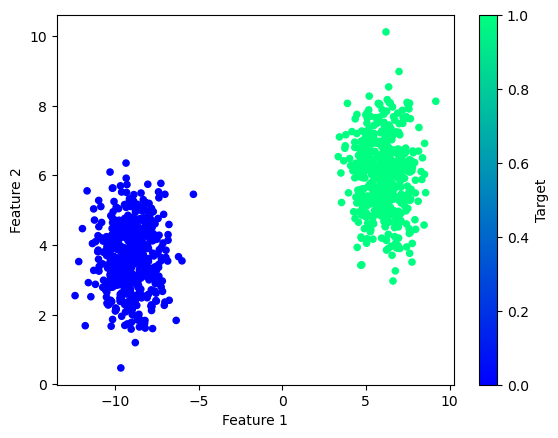

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

Once we have our dummy data generated, we'll split our data into training and test datasets using Scikit-learn's train_test_split method.

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

Now that we have our training data, we need to prepare the dataset for our neural network model. As with any machine learning algorithm, it is crucial to normalize or standardize our numerical variables to ensure that our neural network does not focus on outliers and can apply proper weights to each input. In most cases, the more that input variables are normalized to the same scale, the more stable the neural network model is, and the better the neural network model will generalize. 

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

To create the neural network in our notebook, first we must create our Sequential model.

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

The nn_model object will store the entire architecture of our neural network model. Our next step is to add our first layer, which will contain our inputs and a hidden layer of neurons.

The Keras module does not have specific classes for input, hidden, and output layers. All layers are built using the Dense class, and the input and first hidden layer are always built in the same instance.

As we learned earlier, we can add layers to our Sequential model using Keras' Dense class. For our first layer, we need to define a few parameters:

- The input_dimparameter indicates how many inputs will be in the model (in this case two).
- The units parameter indicates how many neurons we want in the hidden layer (in this case one).
- The activation parameter indicates which activation function to use. We'll use the ReLU activation function to allow our hidden layer to identify and train on nonlinear relationships in the dataset.

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Defining an activation function as part of the first layer is suggested but not required. By default, a Dense layer will look for linear relationships.

Now that we have our input and hidden layers built, we need to add an output layer:

we'll use the Dense class to tell our Sequential model what to do with the data. This time, we only need to supply the number of output neurons. For a classification model, we only want a yes or no binary decision; therefore, we only need one output neuron. In our previous layer, we used a ReLU activation function to enable nonlinear relationships; however, for our classification output, we want to use a sigmoid activation function to produce a probability output.

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

Now that we have added our layers to the Sequential model, we can double-check our model structure using the summary method. 

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters in each layer does not equal the number of neurons we defined in the notebook. Remember, every layer has one additional input known as our bias term (or weighted constant).

Now that we have our layers defined, we have to inform the model how it should train using the input data. The process of informing the model how it should learn and train is called compiling the model.

Depending on the function of the neural network, we'll have to compile the neural network using a specific optimization function and loss metric. The optimization function shapes and molds a neural network model while it is being trained to ensure that it performs to the best of its ability. The loss metric is used by machine learning algorithms to score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input. To enhance the performance of our classification neural network, we'll use the adam optimizer, which uses a gradient descent approach to ensure that the algorithm will not get stuck on weaker classifying variables and features. As for the loss function, we'll use binary_crossentropy, which is specifically designed to evaluate a binary classification model.

Links:
- https://www.tensorflow.org/guide/keras
- https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- https://www.tensorflow.org/api_docs/python/tf/keras/losses


In addition to the optimization function and loss metric, we'll also add a more reader-friendly evaluation metric, which measures the quality of the machine learning model. There are two main types of evaluation metrics—the model predictive accuracy and model mean squared error (MSE). We use accuracy for classification models and msefor regression models. For model predictive accuracy, the higher the number the better, whereas for regression models, MSE should reduce to zero.

- loss metric:  Measures how poorly a model characterizes the data after each iteration.
- evaluation metric: Measures the quality of a machine learning model.
- optimization function: Improves the performance of a machine learning algorithm.
- activation function: Adds an additional step at each layer.

In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train and Test a Basic Neural Network

At last, our Sequential neural network is modeled and compiled, so now we can move onto training/fitting our model to the dummy data. To train/fit our Keras model, we'll use the fit method and provide the x training values and y training values, as well as the number of epochs. Each epoch is a complete pass through the training data. As we tested earlier in the TensorFlow Playground, the neural network binary classification model reached optimal performance at around 100 epochs. Since we designed our Sequential model to match the TensorFlow Playground simulation, we should expect similar performance.

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 3s 3ms/step - loss: 0.5489 - accuracy: 0.9720
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5364 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5237 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4976 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4844 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 1.0000
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.0902 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0887 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0834 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 954us/step - loss: 0.0821 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0808 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0784 - accuracy: 1.0000
Epoch 92/10

Looking at the model training output, we know that the loss metric was 0.07 and the predictive accuracy is 1.0. This means that although our model performance had more loss than the simulation data, the model correctly classifies all of our training data, which is sufficient for our needs. Note that the model isn't seeded, meaning that the results in your notebook will likely not be identical to one in this example. However, you should observe similar general trends.

Under the hood, the neural network will select random weights to start training the model, so that each and every time we create a neural network, the model will be different. However, due to the adam optimizer, our model's end performance should be very similar, regardless of the loss function.

When training completes, the model object stores the loss and accuracy metrics across all epochs, which we can use to visualize the training progress. For example, if we wanted to visualize our model's loss over the full 100 epochs, we can run the following code

<AxesSubplot:>

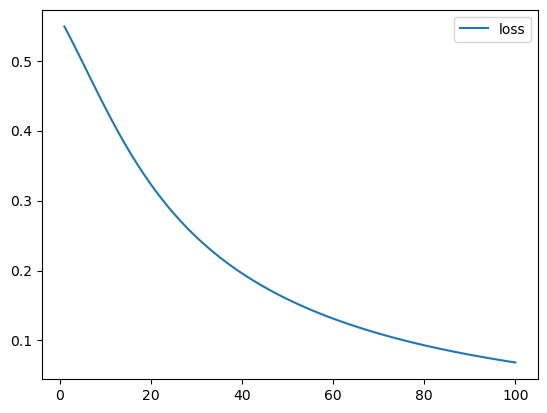

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

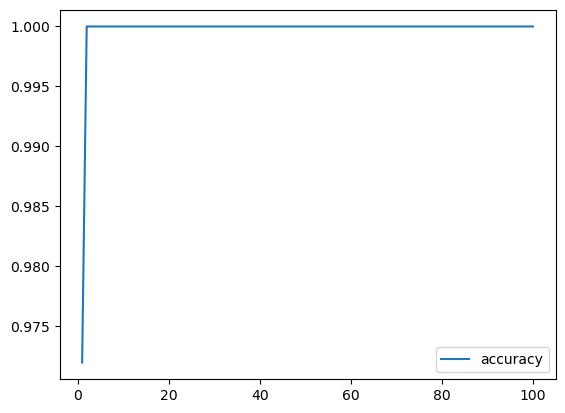

In [12]:
# we can plot the accuracy over time using the same DataFrame:
# Plot the accuracy
history_df.plot(y="accuracy")

Remember, our neural network consisted of a single hidden layer with one neuron—if we were to increase the number of neurons in the hidden layer, the neural network would have been able to fit the training data even faster!

Now that our model has been properly trained, we must evaluate model performance using the test data. Testing a neural network model in TensorFlow is very similar to testing a machine learning model in Scikit-learn. For our purposes, we'll use the evaluate method and print the testing loss and accuracy values. 

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 1s - loss: 0.0703 - accuracy: 1.0000 - 641ms/epoch - 80ms/step
Loss: 0.07027190178632736, Accuracy: 1.0


Looking at the performance metrics from the model, the neural network was able to correctly classify each of the points in the test data. In other words, the model was able to correctly classify data it was not trained on 100% of the time. Although perfect model performance is ideal, more complex datasets and models may not be able to achieve 100% accuracy. Therefore, it is important to establish model performance thresholds before designing any machine learning model. Depending on the type of data and the use case, we may have to recreate and retrain a model using different parameters, different training/test data, or even look to use a different model entirely.

Now that we have a trained neural network model and we have verified its performance using a test dataset, we can apply this model to novel datasets and predict the classification of a data point. In our Sequential model, we can use the predict method to generate predictions on new data. 

In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 72ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

# Nuances of Neural Networks on Nonlinear Numbers
Now that we have designed a basic single-neuron, single-layer model, trained the model, and evaluated its performance using a test dataset, we are ready to start testing the limits of the basic neural network. As previously mentioned, simple linear regression and singular perceptron models work really well as a binary classifier when the data is linearly separable. But what about nonlinear data? How does our basic neural network model behave when data becomes more complicated?

To test this behavior, let's generate some new dummy data. This time we'll generate some nonlinear moon-shaped data using Scikit-learn's make_moons method and visualize it using Pandas and Matplotlib

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

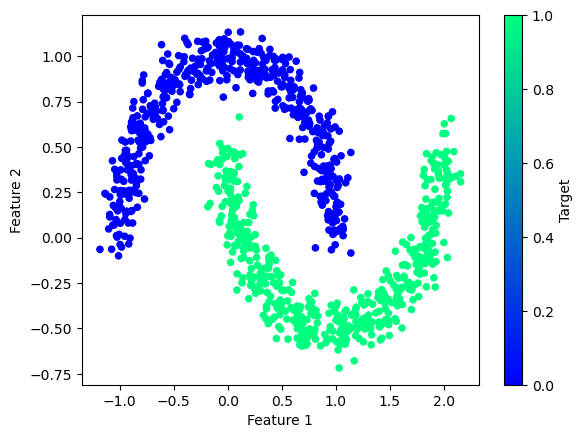

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

Since we are not changing the structure of our neural network, nor are we changing its function, we can use the same Sequential model object. The only difference from our previous workflow is this time we will retrain and evaluate on the nonlinear moon-shaped data.

As with our previous dummy data example, we need to split our nonlinear data into training and testing datasets and normalize our datasets.

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

train our neural network model using the fit method on the nonlinear training data.

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0353 - accuracy: 0.5120
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9310 - accuracy: 0.5253
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8593 - accuracy: 0.5387
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8097 - accuracy: 0.5507
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7720 - accuracy: 0.5627
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7422 - accuracy: 0.5840
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7168 - accuracy: 0.5907
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5973
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.6147
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6565 - accuracy: 0.6240
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 990us/step - loss: 0.2764 - accuracy: 0.8813
Epoch 84/100
24/24 [==============================] - 0s 954us/step - loss: 0.2757 - accuracy: 0.8813
Epoch 85/100
24/24 [==============================] - 0s 954us/step - loss: 0.2750 - accuracy: 0.8840
Epoch 86/100
24/24 [==============================] - 0s 954us/step - loss: 0.2742 - accuracy: 0.8840
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2736 - accuracy: 0.8840
Epoch 88/100
24/24 [==============================] - 0s 977us/step - loss: 0.2728 - accuracy: 0.8867
Epoch 89/100
24/24 [==============================] - 0s 954us/step - loss: 0.2721 - accuracy: 0.8840
Epoch 90/100
24/24 [==============================] - 0s 954us/step - loss: 0.2714 - accuracy: 0.8853
Epoch 91/100
24/24 [==============================] - 0s 954us/step - loss: 0.2708 - accuracy: 0.8840
Epoch 92/100
24/24 [==============================] - 0s 911us/step - loss: 0.2703 -

TensorFlow stopped training the model after 100 epochs because the loss metric was no longer decreasing at a substantial rate, and the accuracy was not improving.

Let's plot out the loss and accuracy curves over our training iterations. 

<AxesSubplot:>

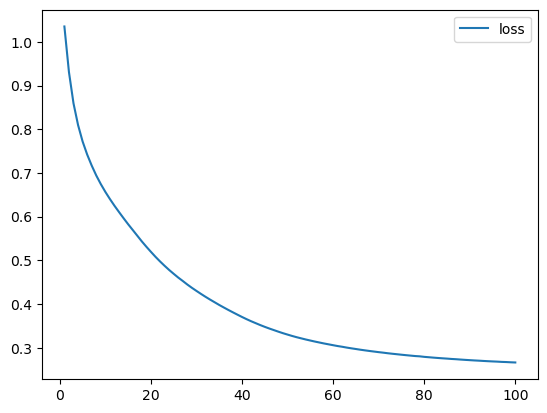

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

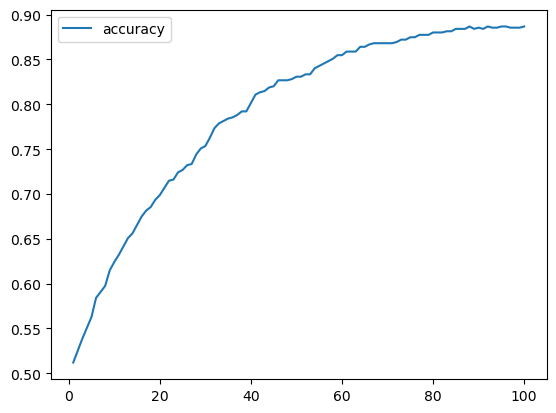

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

According to the accuracy metric, the basic single-neuron, single-layer neural network model was only able to correctly classify 88% of all data points in the nonlinear training data. Depending on a person's use case, 88% accuracy could be sufficient for a first-pass model. For example, if we were trying to use a neural network model to separate left-handed people from right-handed people, a model that is correct 89% of the time is very accurate, and guessing incorrectly does not have a huge negative impact.

However, in many industrial and medical use cases, a model's classification accuracy must exceed 95% or even 99%. In these cases, we wouldn't be satisfied with the basic single-neuron, single-layer neural network model, and we would have to design a more robust neural network. In summary, the more complicated and nonlinear the dataset, the more components we'd need to add to a neural network to achieve our desired performance.

# Create the Connective Tissue, the Multiple Neuron Neural Network

Adding neurons to a neural network can help to generate a well-performing model faster than using a single-neuron, single-layer neural network. In fact, there are multiple advantages to adding neurons to our hidden layer in a neural network. Some of the advantages follow:

- There is a distributed effort to find optimal weights—faster.
- Each neuron can focus on different features to identify nonlinear effects—smarter.
- It is less likely to fixate on complex variables—more robust.

So, if adding more neurons to our neural network model increases the performance, why wouldn't we always use the maximum number of neurons? There are two main reasons to limit the number of neurons in a neural network model: overfitting and computation resources. Similar to other machine learning algorithms, neural networks are susceptible to overfitting where the model fits the training data too well. As a result of overfitting, the neural network will not generalize well and won't be able to classify new data correctly. Additionally, a neural network model with a large number of neurons requires equally large training dataset—training a large neural network requires more data, more epochs, and more time. Therefore, it is important that a neural network model has an appropriate number of neurons to match the size of the data, the complexity of the problem, and the amount of input neurons

A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs.

Since our blob and moon-shaped dummy datasets are created using two variables, our neural network model uses two input values, so SIX NEURONS.

Since we want to change the structure of our neural network model, we must first create a new Sequential model

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

Using our new Sequential model, we'll add our input, hidden, and output layers using the Dense class. However, this time we'll create a hidden layer with six neurons instead of one by changing the units parameter while keeping all other parameters the same.

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

Now that our new Sequential model is defined, we need to compile and train the model using our nonlinear moon-shaped dummy data

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.6733 - accuracy: 0.4853
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6491 - accuracy: 0.5333
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.6613
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6040 - accuracy: 0.7333
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.8040
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.8293
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5406 - accuracy: 0.8453
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5208 - accuracy: 0.8533
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.8667
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.8720
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2182 - accuracy: 0.9080
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2179 - accuracy: 0.9053
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2176 - accuracy: 0.9067
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2172 - accuracy: 0.9067
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2169 - accuracy: 0.9067
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2166 - accuracy: 0.9080
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2164 - accuracy: 0.9053
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2161 - accuracy: 0.9053
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2157 - accuracy: 0.9053
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2154 - accuracy: 0.9053
Epoch 93/100


Looking at the training metrics of our new model, as we increase the number of neurons within the hidden layer, the classification accuracy improves. You may have noticed that adding multiple neurons to our neural network did not yield a perfect classification model. As input data becomes more complex, neural networks will require more and more optimization tweaks to achieve their desired accuracy.

# Synaptic Boost

When a neural network model does not meet performance expectations, it is usually due to one of two causes: inadequate or inappropriate model design for a given dataset, or insufficient or ineffective training data. Although collecting more training/test data is almost always beneficial, it may be impossible due to budget or logistical limitations. Therefore, the most straightforward means of improving neural network performance is tweaking the model design and parameters.

When it comes to tweaking a neural network model, a little can go a long way. If we tweak too many design aspects and parameters at once, we can cause a model to become less effective without a means of understanding why. To avoid trapping ourselves in endless optimization iterations, we can use characteristics of our input data to determine what parameters should be changed.

There are a few means of optimizing a neural network:

- Check out your input dataset: Although neural networks are tolerant of noisy characteristics in a dataset, neural networks can learn bad habits. Even if we standardize and scale our numerical variables, too many outliers in a single variable can lead to performance issues.


- Add more neurons to a hidden layer: Adding neurons to a hidden layer has diminishing returns—more neurons means more data as well as a risk to overfitting the model.


- Add additional hidden layers: Instead of adding more neurons, we could change the structure of the model by adding additional hidden layers, which allows neurons to train on activated input values, instead of looking at new training data. Therefore, a neural network with multiple layers can identify nonlinear characteristics of the input data without requiring more input data. This concept of a multiple-layered neural network is known as a deep learning neural network. 


- Use a different activation function for the hidden layers: strategy to increase performance of a neural network is to change the activation function used across hidden layers. Depending on the shape and dimensionality of the input data, one activation function may focus on specific characteristics of the input values, while another activation function may focus on others.

1. Leaky ReLu, This function is an alternative to another activation function, whereby negative input values will return very small negative values. The Leaky ReLU function is a good alternative for nonlinear input data with many negative inputs.

2. Tanh, This function is identified by a characteristic S curve; however, it transforms the output to a range between -1 and 1.The tanh function can be used for classification or regression, and it expands the range between -1 and 1.

3. Sigmoid,This function is identified by a characteristic S curve. It transforms the output to a range between 0 and 1.The sigmoid function values are normalized to a probability between 0 and 1, which is ideal for binary classification.

4. ReLu, This function returns a value from 0 to infinity, so any negative input through the activation function is 0. It is the most used activation function in neural networks due to its simplifying output, but might not be appropriate for simpler models.  The ReLU function is ideal for looking at positive nonlinear input data for classification or regression.

- Add additional epochs to the training regimen: If your model still requires optimizations and tweaking to meet desired performance, you can increase the number of epochs, or training iterations. As the number of epochs increases, so does the amount of information provided to each neuron. By providing each neuron more information from the input data, the neurons are more likely to apply more effective weight coefficients. Adding more epochs to the training parameters is not a perfect solution—if the model produces weight coefficients that are too effective, there is an increased risk of model overfitting. Therefore, models should be tested and evaluated each time the number of epochs are increased to reduce the risk of overfitting.

By default, the Keras Dense layer will implement the linear activation function, which means that the net sum value is not transformed. In other words:


The linear activation function limits the neural network model to only perform a linear regression. Therefore, the linear activation function is only appropriate for an output layer.

- What is the accuracy of my model? Is it acceptable or does it need to be higher?
- How long did it take to train my model? How many minutes or hours? How many epochs?
- Does it look like my model is as complex as my input data? 

These reflective questions will help you identify what steps are needed to make your neural network (and other machine learning and statistical) models even better!

# Measure Twice, Model Once

neural networks are really good at identifying patterns and trends in data; therefore, they are susceptible to getting stuck when looking at abstract or raw data. When data has many categorical values, or large gaps between numerical values, a neural network might think that these variables are less important (or more important) than they really are. As a result, the neural network may ignore other variables that should provide more meaningful information to the model.

# Categorical Variables

neural networks cannot handle categorical variables in their raw form. Specifically, the perceptron neuron has no way to segment and keep track of all possible values in a categorical variable. Thankfully, there are straightforward solutions to grouping and encoding categorical variables without losing any information across neurons.

# one-hot encoding

For a neural network to understand and evaluate a categorical variable, we must preprocess the values using a technique called one-hot encoding. One-hot encoding identifies all unique column values and splits the single categorical column into a series of columns, each containing information about a single unique categorical value.

# bucketing

Binary encoding ensures that each neuron receives the same amount of information from the categorical variable. As a result, the neural network will interpret each value individually and provide each categorical value with an independent weight.

Although one-hot encoding is a very robust solution, it can be very memory-intensive. Therefore, categorical variables with a large number of unique values (or very large variables with only a few unique values) might become difficult to navigate or filter once encoded. To address this issue, we must reduce the number of unique values in the categorical variables. The process of reducing the number of unique categorical values in a dataset is known as bucketing or binning. Bucketing data typically follows one of two approaches:

1. Collapse all of the infrequent and rare categorical values into a single "other" category.
2. Create generalized categorical values and reassign all data points to the new corresponding values.

The first bucketing approach takes advantage of the fact that uncommon categories and "edge cases" are rarely statistically significant. Therefore, regression and classification models are unlikely to be able to use rare categorical values to produce robust models, and instead will ignore the rare events altogether and focus on more informative values.

The second bucketing approach collapses the number of unique categorical values and maintains relative order and magnitude so that the machine learning model can train on the categorical variable with minimal impact to performance. This approach is particularly useful when dealing with a categorical variable whose distribution of unique values is relatively even. Once we have bucketed our categorical variables, we can proceed to transform the categorical variable using one-hot encoding.



# Encoding Categorical Variables
- the ramen dataset: https://www.theramenrater.com/


Before we can convert "country" into a one-hot encoding, we need to make sure that there are not too many unique values that would cause our dataset to become too wide. The easiest way to check for unique values is to use the Pandas DataFrame's value_counts method. 

In [23]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

How do we determine which countries are uncommon enough to bucket into the "other" category? The most straightforward method is to use a density plot to identify where the value counts "fall off" and set the threshold within this region. 

Produce a density plot in Pandas.

<AxesSubplot:ylabel='Density'>

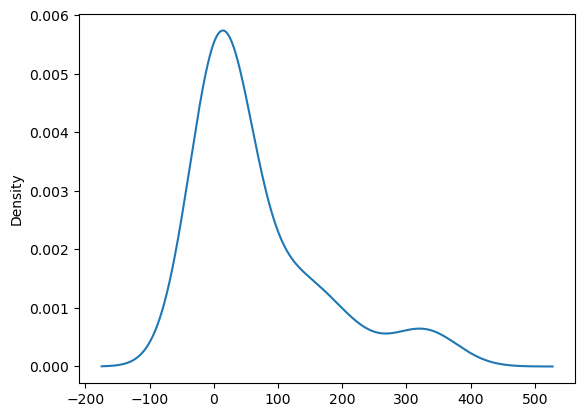

In [24]:
# Visualize the value counts
country_counts.plot.density()

According to the density plot, the most common unique values have more than 100 instances within the dataset. Therefore, we can bucket any country that appears fewer than 100 times in the dataset as "other." To do this, we'll use a Python for loop and Pandas' replace method.

In [25]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

Now that we have reduced the number of unique values in the country variable, we're ready to transpose the variable using one-hot encoding. The easiest way to perform one-hot encoding in Python is to use Scikit-learn's OneHotEncoder module on the country variable. To build the encoded columns, we must create an instance of OneHotEncoder and "fit" the encoder with our values.

In [29]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names_out(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


We must join the encoded DataFrame with the original and drop the original "Country" column. The process of joining the two DataFrames together is handled by the Pandas merge method and can be performed within one line.

In [30]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

C:\Users\alelo\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- The process of bucketing and encoding are two of the most common preprocessing steps required to set up your neural network training datasets.

# Span the Gap Using Standardization
neural network models can interpret and evaluate all forms of numeric data.

There are many reasons why a raw numeric variable is insufficient for use when training a neural network model, such as:

- Raw data often has outliers or extreme values that can artificially inflate a variable's importance.
- Numerical data can be measured using different units across a dataset—such as time versus temperature, or length versus volume.
- The distribution of a variable can be skewed, leading to misinterpretation of the central tendency.

If we use raw numeric data to train a neural network model, there is a chance that the neural network model will perform adequately. However, there is a far greater probability that the neural network model will interpret the raw numerical data inappropriately, which will yield an inadequate model. Thankfully, we can minimize this risk by standardizing (also commonly referred to as normalization) the numerical data prior to training.

- NOTE: Scikit-learn's StandardScaler module standardizes numerical data such that a variable is rescaled to a mean of 0 and standard deviation of 1.

- If we use the StandardScaler module to standardize our numerical variables, we reduce the overall likelihood that outliers, variables of different units, or skewed distributions will have a negative impact on a model's performance.

# Standardization Practice
- DATASET: https://www.kaggle.com/inugami/dataset-on-company-clients-satisfaction

In [31]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


If this dataset contained categorical data, we Slice out the categorical data prior to scaling.

To apply our standardization, we need to create a StandardScaler

In [32]:
# Create the StandardScaler instance
scaler = StandardScaler()

Once we have our StandardScaler instance, we need to fit the input data 

In [33]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

After our StandardScaler instance is fitted with the numerical data, we can transform and standardize the dataset

In [34]:
# Scale the data
scaled_data = scaler.transform(hr_df)

Lastly, once we have our transformed data within the StandardScaler instance, we must export the transformed data into a Pandas DataFrame. 

In [35]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


Looking at the results of our transformation, all of the variables have now been standardized, with a mean value of 0 and a standard deviation of 1. Now the data is ready to be passed along to our neural network model.

# Potential of Neural Networks

neural networks are designed to calculate weights for various input data and pass along an output value based on an activation function. With our basic neural networks, input data is parsed using an input layer, evaluated in a single hidden layer, then calculated in the output layer. In other words, a basic neural network is designed such that the input values are evaluated only once before they are used in a classification or regression equation. Although basic neural networks are relatively easy to conceptualize and understand, there are limitations to using a basic neural network, such as:

- A basic neural network with many neurons will require more training data than other comparable statistics and machine learning models to produce an adequate model.
- Basic neural networks struggle to interpret complex nonlinear numerical data, or data with many confounding factors that have hidden effects on more than one variable.
- Basic neural networks are incapable of analyzing image datasets without severe data preprocessing.

To address the limitations of the basic neural network, we can implement a more robust neural network model by adding additional hidden layers. A neural network with more than one hidden layer is known as a deep neural network

Deep neural networks function similarly to the basic neural network, with one major exception. The outputs of one hidden layer of neurons (that have been evaluated and transformed using an activation function) become the inputs to additional hidden layers of neurons. As a result, the next layer of neurons can evaluate higher order interactions between weighted variables and identify complex, nonlinear relationships across the entire dataset. These additional layers can observe and weight interactions between clusters of neurons across the entire dataset, which means they can identify and account for more information than any number of neurons in a single hidden layer.

Deep neural network models also are commonly referred to as deep learning models due to their ability to learn from example data, regardless of the complexity or data input type. Just like humans, deep learning models can identify patterns, determine severity, and adapt to changing input data from a wide variety of data sources. Compared to basic neural network models, which require a large number of neurons to identify nonlinear characteristics, deep learning models only need a few neurons across a few hidden layers to identify the same nonlinear characteristics.

In addition, deep learning models can train on images, natural language data, soundwaves, and traditional tabular data (data that fits in a table or DataFrame), all with minimal preprocessing and direction.

The best feature of deep learning models is its capacity to systematically process multivariate and abstract data while simultaneously achieving performance results that can mirror or even exceed human-level performance. 

there is no easy solution or rule of thumb to identify how many layers are required to maximize performance. The only way to determine how "deep" the deep learning model should be is through trial and error. You must train and evaluate a model with increasingly deeper and deeper layers until the model no longer demonstrates noticeable improvements over the same number of epochs.

When to implement a deep learning model?
- When other machine learning models are unable to meet desired performance.
- When you need a model capable of analyzing a complex dataset with many features and data points
- When you need to classify nontabular data such as images, voice, and written text



# Imports and Setup

In [36]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [37]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [38]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [40]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names_out(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [41]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

C:\Users\alelo\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


- link: https://www.tensorflow.org/guide/

we want to build a model that will predict whether or not a person is at risk for attrition; therefore, we must separate the "Attrition" columns from the rest of the input data. In fact, because the attrition data is dichotomous (one of two values), we only need to keep the "Attrition_Yes" column—we can ignore the "Attrition_No" column because it is redundant. To separate our features and target as well as perform our training/test split,

In [42]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\alelo\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


At last, our data is preprocessed and separated and ready for modelling. For our purposes, we will use the same framework we used for our basic neural network:

For our input layer, we must add the number of input features equal to the number of variables in our feature DataFrame.
In our hidden layers, our deep learning model structure will be slightly different—we'll add two hidden layers with only a few neurons in each layer. To create the second hidden layer, we'll add another Keras Dense class while defining our model. All of our hidden layers will use the relu activation function to identify nonlinear characteristics from the input values.
In the output layer, we'll use the same parameters from our basic neural network including the sigmoid activation function. The sigmoid activation function will help us predict the probability that an employee is at risk for attrition.

In [44]:
# To create our deep learning model
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 448       
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


the number of weight parameters (weight coefficients) for each layer equals the number of input values times the number of neurons plus a bias term for each neuron. Our first layer has 55 input values, and multiplied by the eight neurons (plus eight bias terms for each neuron) gives us a total of 448 weight parameters—plenty of opportunities for our model to find trends in the dataset.

- If there are eight neurons in the first layer and five neurons in the second layer - eight times five equals 40 parameters, plus five parameters for the bias terms, giving us a total of 45 parameters.

In [45]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Evaluate the Model

In [46]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 3s 3ms/step - loss: 2669.1997 - accuracy: 0.1724
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 1272.7715 - accuracy: 0.1715
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 315.2951 - accuracy: 0.4220
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 50.8024 - accuracy: 0.7132
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 31.8550 - accuracy: 0.7822
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 26.4009 - accuracy: 0.7731
Epoch 7/100
35/35 [==============================] - 0s 1ms/step - loss: 22.5122 - accuracy: 0.7541
Epoch 8/100
35/35 [==============================] - 0s 1ms/step - loss: 19.2850 - accuracy: 0.7523
Epoch 9/100
35/35 [==============================] - 0s 1ms/step - loss: 16.6289 - accuracy: 0.7423
Epoch 10/100
35/35 [==============================] - 0s 1ms/step - loss: 13.9884 - accuracy: 0

35/35 [==============================] - 0s 1ms/step - loss: 0.7264 - accuracy: 0.7713
Epoch 83/100
35/35 [==============================] - 0s 1ms/step - loss: 0.7505 - accuracy: 0.7650
Epoch 84/100
35/35 [==============================] - 0s 1ms/step - loss: 0.9111 - accuracy: 0.7677
Epoch 85/100
35/35 [==============================] - 0s 1ms/step - loss: 1.1934 - accuracy: 0.7468
Epoch 86/100
35/35 [==============================] - 0s 1ms/step - loss: 0.9447 - accuracy: 0.7514
Epoch 87/100
35/35 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.7713
Epoch 88/100
35/35 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.7722
Epoch 89/100
35/35 [==============================] - 0s 1ms/step - loss: 0.7350 - accuracy: 0.7641
Epoch 90/100
35/35 [==============================] - 0s 1ms/step - loss: 1.1385 - accuracy: 0.7505
Epoch 91/100
35/35 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.7623
Epoch 92/100


In [47]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 1.0588 - accuracy: 0.8641 - 160ms/epoch - 13ms/step
Loss: 1.0587881803512573, Accuracy: 0.864130437374115


the model was able to correctly identify employees who are at risk of attrition approximately 87% of the time. Considering that our input data included more than 30 different variables with more than 1,400 data points, the deep learning model was able to produce a fairly reliable classifier.

# Logistic Regression Vs. a Basic Neural Network

In [48]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
# Remove diabetes outcome target from features data
y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [50]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.729


# Neural network

In [52]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
18/18 [==============================] - 1s 1ms/step - loss: 0.5941 - accuracy: 0.7205
Epoch 2/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5748 - accuracy: 0.7361
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7448
Epoch 4/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.7483
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5317 - accuracy: 0.7535
Epoch 6/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.7587
Epoch 7/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.7622
Epoch 8/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7639
Epoch 9/50
18/18 [==============================] - 0s 2ms/step - loss: 0.4976 - accuracy: 0.7691
Epoch 10/50
18/18 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.7778
Epoch 11/50
18/18 [

Either model was able to predict whether or not a patient is diagnosed with diabetes more than 70% of the time.

- neural networks are prone to overfitting and can be more difficult to train than a straightforward logistic regression model
- logistic regression models are easier to dissect

# Support Vector Machine Vs. Deep Learning Model

SVMs are a type of binary classifier that use geometric boundaries to distinguish data points from two separate groups. More specifically, SVMs try to calculate a geometric hyperplane that maximizes the distance between the closest data point of both groups.

excels in classifying data that is linearly separable but fails in nonlinear relationships.

- link dataset: https://www.kaggle.com/datasets/raosuny/success-of-bank-telemarketing-data

In [53]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

# Import our input dataset
tele_df = pd.read_csv('bank_telemarketing.csv')
tele_df.head()

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,other,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin,married,Professional_Education,no,no,no,no


In [54]:
# Generate our categorical variable list
tele_cat = tele_df.dtypes[tele_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
tele_df[tele_cat].nunique()

Job               9
Marital_Status    3
Education         4
Default_Credit    2
Housing_Loan      2
Personal_Loan     2
Subscribed        2
dtype: int64

In [55]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(tele_df[tele_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(tele_cat)
encode_df.head()

C:\Users\alelo\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,Marital_Status_divorced,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [56]:
# Merge one-hot encoded features and drop the originals
tele_df = tele_df.merge(encode_df,left_index=True, right_index=True)
tele_df = tele_df.drop(tele_cat,1)
tele_df.head()

C:\Users\alelo\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [57]:
# Remove loan status target from features data
y = tele_df.Subscribed_yes.values
X = tele_df.drop(columns=["Subscribed_no","Subscribed_yes"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [58]:
# Create the SVM model
svm = SVC(kernel='linear')

In [59]:
# Train the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [60]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.873


# deep learning model

In [61]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [62]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
715/715 [==============================] - 1s 975us/step - loss: 0.3999 - accuracy: 0.8715
Epoch 2/50
715/715 [==============================] - 1s 1ms/step - loss: 0.3717 - accuracy: 0.8734
Epoch 3/50
715/715 [==============================] - 1s 1ms/step - loss: 0.3686 - accuracy: 0.8735
Epoch 4/50
715/715 [==============================] - 1s 1ms/step - loss: 0.3678 - accuracy: 0.8735
Epoch 5/50
715/715 [==============================] - 1s 995us/step - loss: 0.3666 - accuracy: 0.8731
Epoch 6/50
715/715 [==============================] - 1s 1ms/step - loss: 0.3661 - accuracy: 0.8732
Epoch 7/50
715/715 [==============================] - 1s 1ms/step - loss: 0.3657 - accuracy: 0.8734
Epoch 8/50
715/715 [==============================] - 1s 1ms/step - loss: 0.3654 - accuracy: 0.8735
Epoch 9/50
715/715 [==============================] - 1s 993us/step - loss: 0.3647 - accuracy: 0.8731
Epoch 10/50
715/715 [==============================] - 1s 963us/step - loss: 0.3645 - accuracy

 the SVM and deep learning models both achieved a predictive accuracy around 87%. Additionally, both models take similar amounts of time to train on the input data. The only noticeable difference between the two models is implementation—the amount of code required to build and train the SVM is notably less than the comparable deep learning model

# Random Forest Vs. Deep Learning Model

In [63]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
loans_df = pd.read_csv('loan_status.csv')
loans_df.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0


In [64]:
# Generate our categorical variable list
loans_cat = loans_df.dtypes[loans_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
loans_df[loans_cat].nunique()

Loan_Status              2
Term                     2
Years_in_current_job    11
Home_Ownership           4
Purpose                  7
dtype: int64

In [65]:
# Check the unique value counts to see if binning is required
loans_df.Years_in_current_job.value_counts()

10+_years    13149
2_years       3225
3_years       2997
<_1_year      2699
5_years       2487
4_years       2286
1_year        2247
6_years       2109
7_years       2082
8_years       1675
9_years       1467
Name: Years_in_current_job, dtype: int64

In [67]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(loans_df[loans_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names_out(loans_cat)
encode_df.head()

,Loan_Status_Fully_Paid,Loan_Status_Not_Paid,Term_Long_Term,Term_Short_Term,Years_in_current_job_10+_years,Years_in_current_job_1_year,Years_in_current_job_2_years,Years_in_current_job_3_years,Years_in_current_job_4_years,Years_in_current_job_5_years,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [68]:
# Merge one-hot encoded features and drop the originals
loans_df = loans_df.merge(encode_df,left_index=True, right_index=True)
loans_df = loans_df.drop(loans_cat,1)
loans_df.head()

C:\Users\alelo\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217646,730.0,1184194.0,10855.08,19.6,10.0,13,1,122170,272052.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,548746,678.0,2559110.0,18660.28,22.6,33.0,4,0,437171,555038.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,99999999,728.0,714628.0,11851.06,16.0,76.0,16,0,203965,289784.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,99999999,740.0,776188.0,11578.22,8.5,25.0,6,0,134083,220220.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [69]:
# Remove loan status target from features data
y = loans_df.Loan_Status_Fully_Paid
X = loans_df.drop(columns=["Loan_Status_Fully_Paid","Loan_Status_Not_Paid"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [70]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.849


# Deep Learning Model

In [71]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 12

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
854/854 [==============================] - 2s 1ms/step - loss: 0.4232 - accuracy: 0.8359
Epoch 2/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3858 - accuracy: 0.8486
Epoch 3/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3822 - accuracy: 0.8488
Epoch 4/50
854/854 [==============================] - 1s 997us/step - loss: 0.3804 - accuracy: 0.8494
Epoch 5/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3789 - accuracy: 0.8495
Epoch 6/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3779 - accuracy: 0.8495
Epoch 7/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3772 - accuracy: 0.8498
Epoch 8/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3765 - accuracy: 0.8499
Epoch 9/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3752 - accuracy: 0.8501
Epoch 10/50
854/854 [==============================] - 1s 1ms/step - loss: 0.3755 - accuracy: 0.84

f we compare both model's predictive accuracy, their output is very similar. Both the random forest and deep learning models were able to predict correctly whether or not a loan will be repaid over 80% of the time. Although their predictive performance was comparable, their implementation and training times were not—the random forest classifier was able to train on the large dataset and predict values in seconds, while the deep learning model required a couple minutes to train on the tens of thousands of data points. In other words, the random forest model is able to achieve comparable predictive accuracy on large tabular data with less code and faster performance.

# Deep Learning Steps

1. Import dependencies.
2. Import the input dataset.
3. Generate categorical variable list.
4. Create a OneHotEncoder instance.
5. Fit and transform the OneHotEncoder.
6. Add the encoded variable names to the DataFrame.
7. Merge one-hot encoded features and drop the originals.
8. Split the preprocessed data into features and target arrays.
9. Split the preprocessed data into training and testing dataset.
10. Create a StandardScaler instance.
11. Fit the StandardScaler.
12. Scale the data.
13. Define the model.
14. Add first and second hidden layers.
15. Add the output layer.
16. Check the structure of the model.

In [72]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [73]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
832/854 [============================>.] - ETA: 0s - loss: 0.3625 - accuracy: 0.8536
Epoch 1: saving model to checkpoints\weights.01.hdf5
854/854 [==============================] - 2s 2ms/step - loss: 0.3630 - accuracy: 0.8531
Epoch 2/100
824/854 [===========================>..] - ETA: 0s - loss: 0.3616 - accuracy: 0.8535
Epoch 2: saving model to checkpoints\weights.02.hdf5
854/854 [==============================] - 1s 1ms/step - loss: 0.3618 - accuracy: 0.8536
Epoch 3/100
849/854 [============================>.] - ETA: 0s - loss: 0.3625 - accuracy: 0.8537
Epoch 3: saving model to checkpoints\weights.03.hdf5
854/854 [==============================] - 1s 1ms/step - loss: 0.3625 - accuracy: 0.8538
Epoch 4/100
850/854 [============================>.] - ETA: 0s - loss: 0.3615 - accuracy: 0.8543
Epoch 4: saving model to checkpoints\weights.04.hdf5
854/854 [==============================] - 1s 1ms/step - loss: 0.3613 - accuracy: 0.8544
Epoch 5/100
823/854 [=======================

815/854 [===========================>..] - ETA: 0s - loss: 0.3566 - accuracy: 0.8558
Epoch 35: saving model to checkpoints\weights.35.hdf5
854/854 [==============================] - 1s 2ms/step - loss: 0.3574 - accuracy: 0.8555
Epoch 36/100
842/854 [============================>.] - ETA: 0s - loss: 0.3572 - accuracy: 0.8549
Epoch 36: saving model to checkpoints\weights.36.hdf5
854/854 [==============================] - 1s 1ms/step - loss: 0.3575 - accuracy: 0.8548
Epoch 37/100
814/854 [===========================>..] - ETA: 0s - loss: 0.3560 - accuracy: 0.8556
Epoch 37: saving model to checkpoints\weights.37.hdf5
854/854 [==============================] - 1s 1ms/step - loss: 0.3575 - accuracy: 0.8550
Epoch 38/100
814/854 [===========================>..] - ETA: 0s - loss: 0.3567 - accuracy: 0.8561
Epoch 38: saving model to checkpoints\weights.38.hdf5
854/854 [==============================] - 1s 1ms/step - loss: 0.3569 - accuracy: 0.8561
Epoch 39/100
850/854 [===========================

833/854 [============================>.] - ETA: 0s - loss: 0.3544 - accuracy: 0.8567
Epoch 69: saving model to checkpoints\weights.69.hdf5
854/854 [==============================] - 1s 990us/step - loss: 0.3543 - accuracy: 0.8569
Epoch 70/100
844/854 [============================>.] - ETA: 0s - loss: 0.3540 - accuracy: 0.8569
Epoch 70: saving model to checkpoints\weights.70.hdf5
854/854 [==============================] - 1s 979us/step - loss: 0.3543 - accuracy: 0.8568
Epoch 71/100
812/854 [===========================>..] - ETA: 0s - loss: 0.3543 - accuracy: 0.8565
Epoch 71: saving model to checkpoints\weights.71.hdf5
854/854 [==============================] - 1s 1ms/step - loss: 0.3543 - accuracy: 0.8569
Epoch 72/100
833/854 [============================>.] - ETA: 0s - loss: 0.3534 - accuracy: 0.8579
Epoch 72: saving model to checkpoints\weights.72.hdf5
854/854 [==============================] - 1s 992us/step - loss: 0.3538 - accuracy: 0.8575
Epoch 73/100
829/854 [=====================

In [74]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

ValueError: Cannot assign value to variable ' dense_15/kernel:0': Shape mismatch.The variable shape (36, 8), and the assigned value shape (36, 24) are incompatible.

- link: https://en.wikipedia.org/wiki/Hierarchical_Data_Format

we can use the Keras Sequential model's save method to export the entire model (weights, structure, and configuration settings) to an Hierarchical Data Format (HDF5 Links to an external site.) file. Once saved, anyone can import the exact same trained model to their environment by using the Keras load_model method and use it for analysis.

NOTE

In [75]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [77]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [79]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

285/285 - 0s - loss: 0.6995 - accuracy: 0.5757 - 281ms/epoch - 987us/step
Loss: 0.6995244026184082, Accuracy: 0.5756644010543823
